<a href="https://colab.research.google.com/github/deepthikanna/ML_DecisionTree_02/blob/main/_Credit_Risk_Analyser.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes='True')
%matplotlib inline

In [ ]:
df=pd.read_csv("/content/credit_data.csv")

In [ ]:
df.shape

(50636, 13)

In [ ]:
df.head()

,age,gender,education,occupation,organization_type,seniority,annual_income,disposable_income,house_type,vehicle_type,marital_status,no_card,default
0,19,0,0,1,0,4,186319,21625,1,1,0,0,1
1,18,0,3,1,0,4,277022,20442,3,1,0,0,1
2,29,0,3,2,0,0,348676,24404,3,1,0,1,1
3,18,0,0,3,0,4,165041,2533,3,1,0,0,1
4,26,0,2,2,0,2,348745,19321,3,1,0,1,1


In [ ]:
df.tail()

,age,gender,education,occupation,organization_type,seniority,annual_income,disposable_income,house_type,vehicle_type,marital_status,no_card,default
50631,31,Female,Under Graduate,Professional,None,None,674450,21695,Rented,Two Wheeler,Married,2,0
50632,29,Female,Other,Business,None,None,78661,3617,Rented,Two Wheeler,Married,2,0
50633,25,Male,Post Graduate,Business,None,None,333840,11636,Owned,None,Married,1,0
50634,29,Male,Graduate,Salaried,None,Entry,306053,43751,Rented,None,Single,0,0
50635,25,Male,Graduate,Business,None,None,385157,32684,Family,Two Wheeler,Married,0,0


In [ ]:
df.describe

<bound method NDFrame.describe of        age  gender  education  ...  marital_status  no_card  default
0       19       0          0  ...               0        0        1
1       18       0          3  ...               0        0        1
2       29       0          3  ...               0        1        1
3       18       0          0  ...               0        0        1
4       26       0          2  ...               0        1        1
...    ...     ...        ...  ...             ...      ...      ...
50631   31       1          3  ...               0        2        0
50632   29       1          1  ...               0        2        0
50633   25       0          2  ...               0        1        0
50634   29       0          0  ...               2        0        0
50635   25       0          0  ...               0        0        0

[50636 rows x 13 columns]>

In [ ]:
gender_map={'Male':0,'Female':1}
df['gender']=df['gender'].map(gender_map)

In [ ]:
education_map={'Graduate' : 0, 'Other' : 1, 'Post Graduate' : 2, 'Under Graduate' : 3}
df['education']=df['education'].map(education_map)

In [ ]:
occupation_map={'Business':0, 'Professional':1, 'Salaried':2, 'Student':3}
df['occupation']=df['occupation'].map(occupation_map)

In [ ]:
organization_type_map={'None':0, 'Tier 1':1, 'Tier 2':2, 'Tier 3':3}
df['organization_type']=df['organization_type'].map(organization_type_map)

In [ ]:
seniority_map={'Entry':0, 'Junior':1, 'Mid-level 1':2, 'Mid-level 2':3, 'None':4, 'Senior':5}
df['seniority']=df['seniority'].map(seniority_map)

In [ ]:
house_type_map={'Company provided':0, 'Family':1, 'Owned':2, 'Rented':3}
df['house_type']=df['house_type'].map(house_type_map)

In [ ]:
vehicle_type_map={'Four Wheeler':0, 'None':1, 'Two Wheeler':2}
df['vehicle_type']=df['vehicle_type'].map(vehicle_type_map)

In [ ]:
marital_status_map={'Married':0, 'Other':1, 'Single':2}
df['marital_status']=df['marital_status'].map(marital_status_map)

In [ ]:
df.head()

,age,gender,education,occupation,organization_type,seniority,annual_income,disposable_income,house_type,vehicle_type,marital_status,no_card,default
0,19,0,0,1,0,4,186319,21625,1,1,0,0,1
1,18,0,3,1,0,4,277022,20442,3,1,0,0,1
2,29,0,3,2,0,0,348676,24404,3,1,0,1,1
3,18,0,0,3,0,4,165041,2533,3,1,0,0,1
4,26,0,2,2,0,2,348745,19321,3,1,0,1,1


In [ ]:
df.describe

<bound method NDFrame.describe of        age  gender  education  ...  marital_status  no_card  default
0       19       0          0  ...               0        0        1
1       18       0          3  ...               0        0        1
2       29       0          3  ...               0        1        1
3       18       0          0  ...               0        0        1
4       26       0          2  ...               0        1        1
...    ...     ...        ...  ...             ...      ...      ...
50631   31       1          3  ...               0        2        0
50632   29       1          1  ...               0        2        0
50633   25       0          2  ...               0        1        0
50634   29       0          0  ...               2        0        0
50635   25       0          0  ...               0        0        0

[50636 rows x 13 columns]>

In [ ]:
from sklearn.model_selection import train_test_split
feature_col_names=['age','gender','education','occupation','organization_type','seniority','annual_income','disposable_income','house_type','vehicle_type','marital_status','no_card']
pred_class_names=['default']
X=df[feature_col_names].values
y=df[pred_class_names].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.30,random_state=42)


In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dm1=DecisionTreeClassifier(criterion='entropy',random_state=40,min_samples_leaf=20,min_samples_split=20)

In [ ]:
dm1.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=20, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=40, splitter='best')

In [ ]:
dm1_entropy_score=dm1.score(X_test,y_test)
dm1_entropy_score

0.8477387927062077

In [ ]:
dm2=DecisionTreeClassifier(criterion='gini',random_state=0,min_samples_leaf=20,min_samples_split=20)

In [ ]:
dm2.fit(X_train,y_train.ravel())

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=20, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
dm2_entropy_score=dm2.score(X_test,y_test)
dm2_entropy_score

0.8451714831150023

In [ ]:
y_pred1=dm1.predict(X_test)
y_pred1

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred1))
print(classification_report(y_test, y_pred1))

[[12161   564]
 [ 1749   717]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.91     12725
           1       0.56      0.29      0.38      2466

    accuracy                           0.85     15191
   macro avg       0.72      0.62      0.65     15191
weighted avg       0.82      0.85      0.83     15191



In [ ]:
y_pred2=dm2.predict(X_test)
y_pred2

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred2))
print(classification_report(y_test, y_pred2))

[[12139   586]
 [ 1766   700]]
              precision    recall  f1-score   support

           0       0.87      0.95      0.91     12725
           1       0.54      0.28      0.37      2466

    accuracy                           0.85     15191
   macro avg       0.71      0.62      0.64     15191
weighted avg       0.82      0.85      0.82     15191



In [ ]:
dm1.predict([[19,0,0,1,0,4,186319,21625,1,1,0,0]])

array([1])

In [ ]:
dm2.predict([[19,0,0,1,0,4,186319,21625,1,1,0,0]])

array([1])

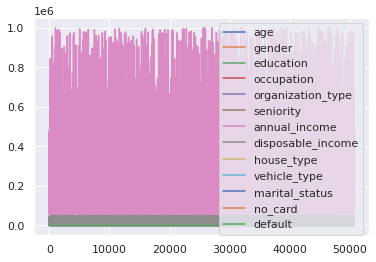

In [ ]:
df.plot()

In [ ]:
range_annual_income=df['annual_income'].max()-df['annual_income'].min()
range_annual_income

949844

In [ ]:
range_disposable_income=df['disposable_income'].max()-df['disposable_income'].min()
range_disposable_income

48999

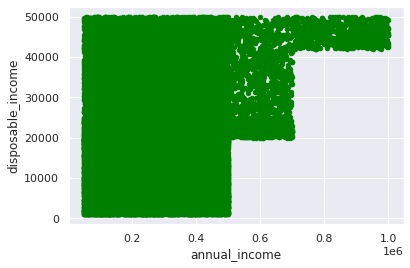

In [ ]:
df.plot('annual_income','disposable_income',kind='scatter',color='green')

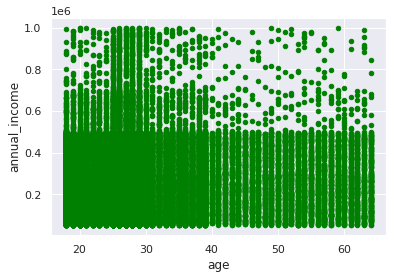

In [ ]:
df.plot('age','annual_income',kind='scatter',color='green')

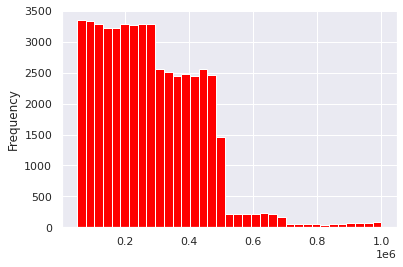

In [ ]:
df['annual_income'].plot(kind='hist',bins=35,color='red')


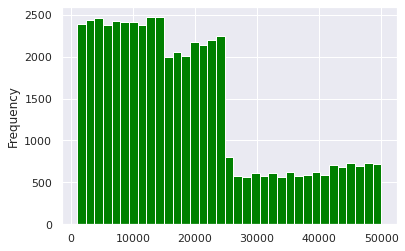

In [ ]:
df['disposable_income'].plot(kind='hist',bins=35,color='green')